In [1]:
!nvidia-smi

Wed Mar 20 10:52:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download dataset from Roboflow

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="JSVeJAx7mmzoT48naM0W")
project = rf.workspace("idcardocr-cnbea").project("idcard-text-detection")
version = project.version(3)
dataset = version.download("yolov8")


/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.1.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you ha


Extracting Dataset Version Zip to idCard-text-detection-3 in yolov8:: 100%|██████████| 402/402 [00:00<00:00, 8022.91it/s]


# Custom training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model='/kaggle/input/yolov8-text-idcard-detection-weights/best.pt' data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/kaggle/working
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/yolov8-text-idcard-detection-weights/best.pt, data=/kaggle/working/datasets/idCard-text-detection-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
args.yaml					  train_batch400.jpg
confusion_matrix.png				  train_batch401.jpg
confusion_matrix_normalized.png			  train_batch402.jpg
events.out.tfevents.1710931990.ecb9afb540d1.67.0  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
labels_correlogram.jpg				  weights
results.csv


/kaggle/working


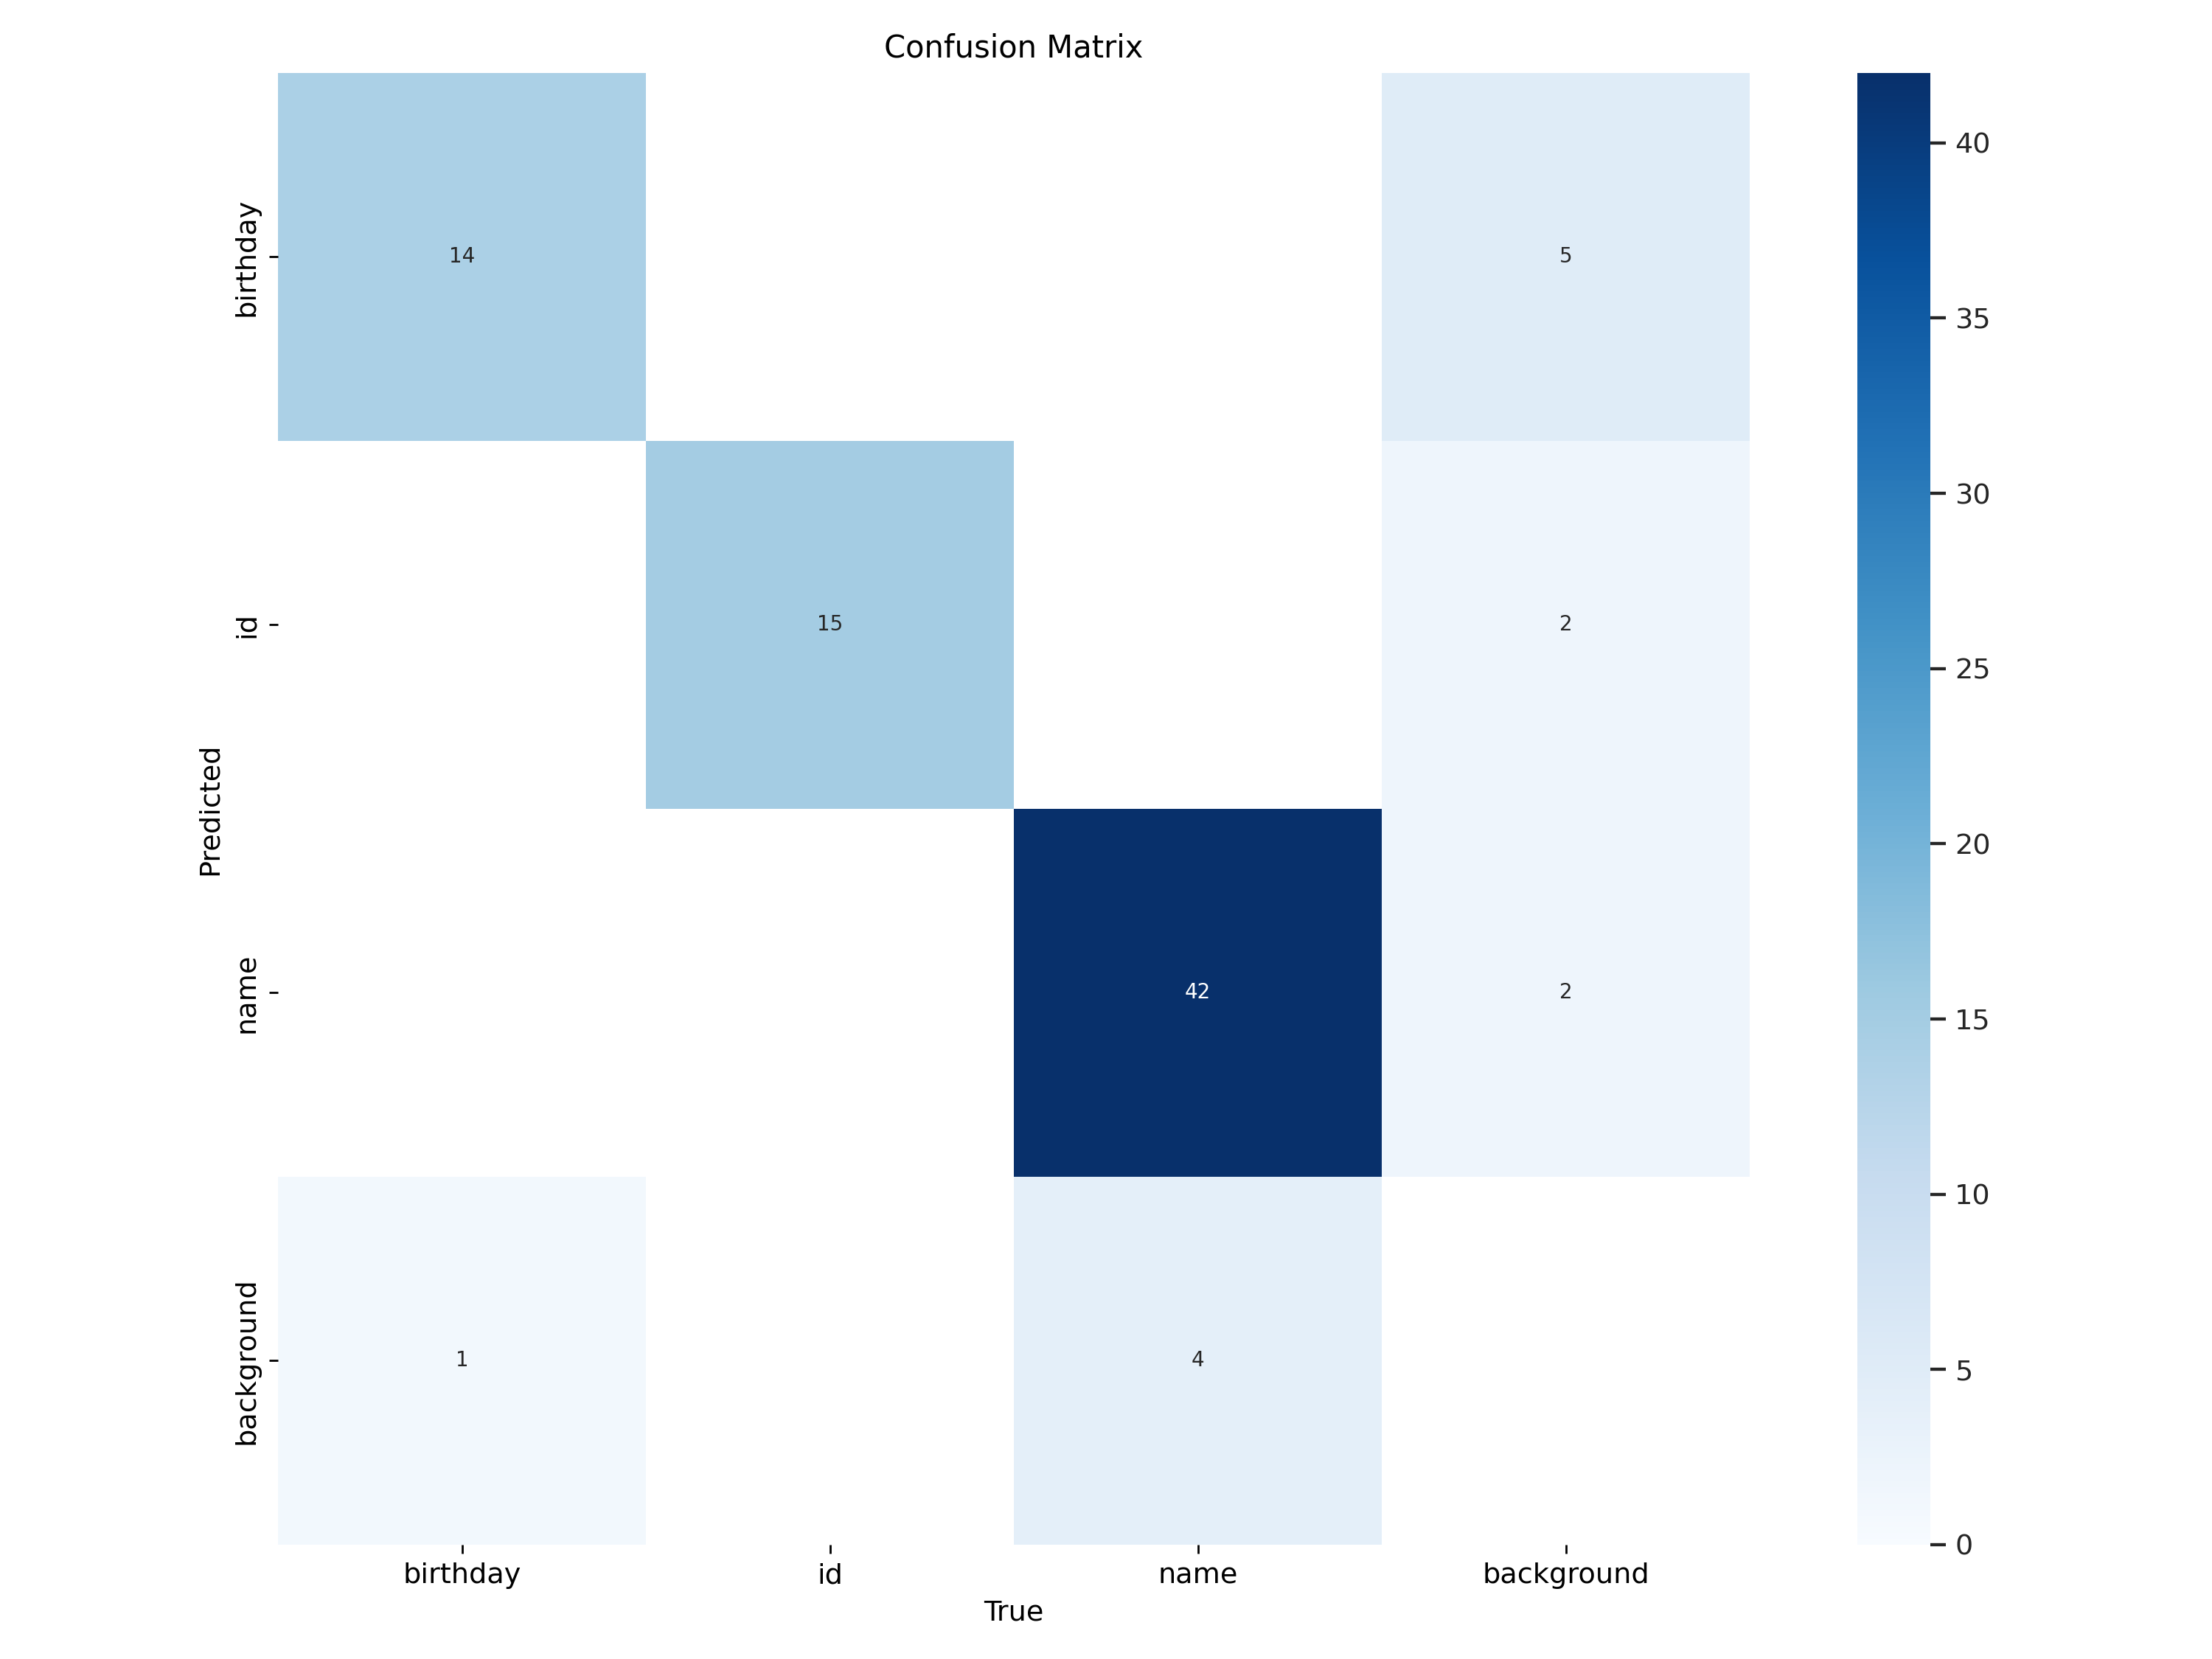

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


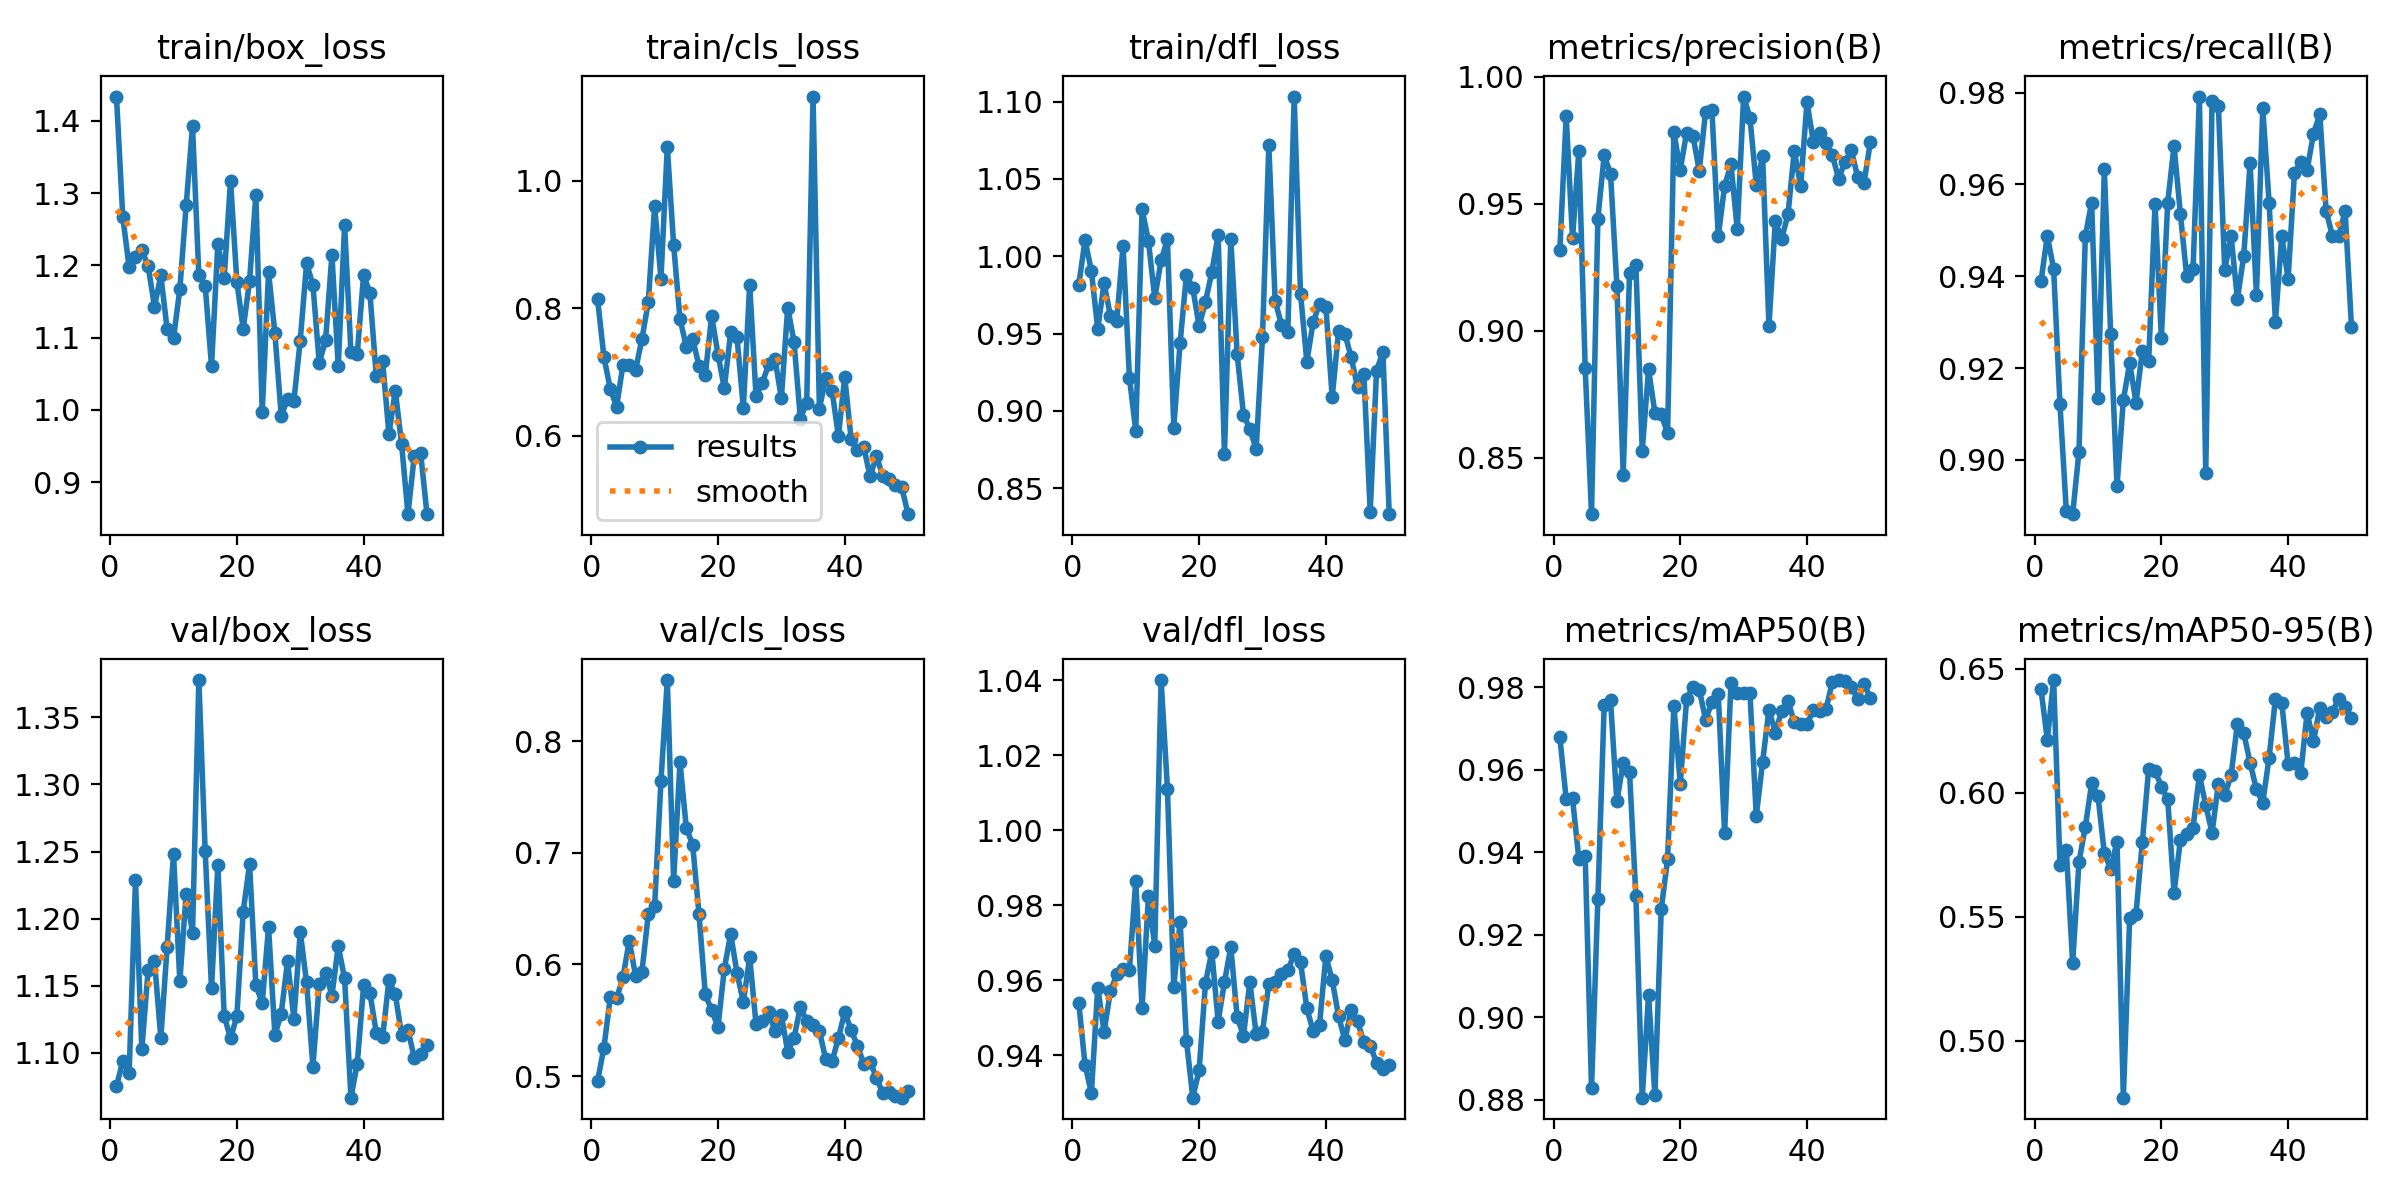

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


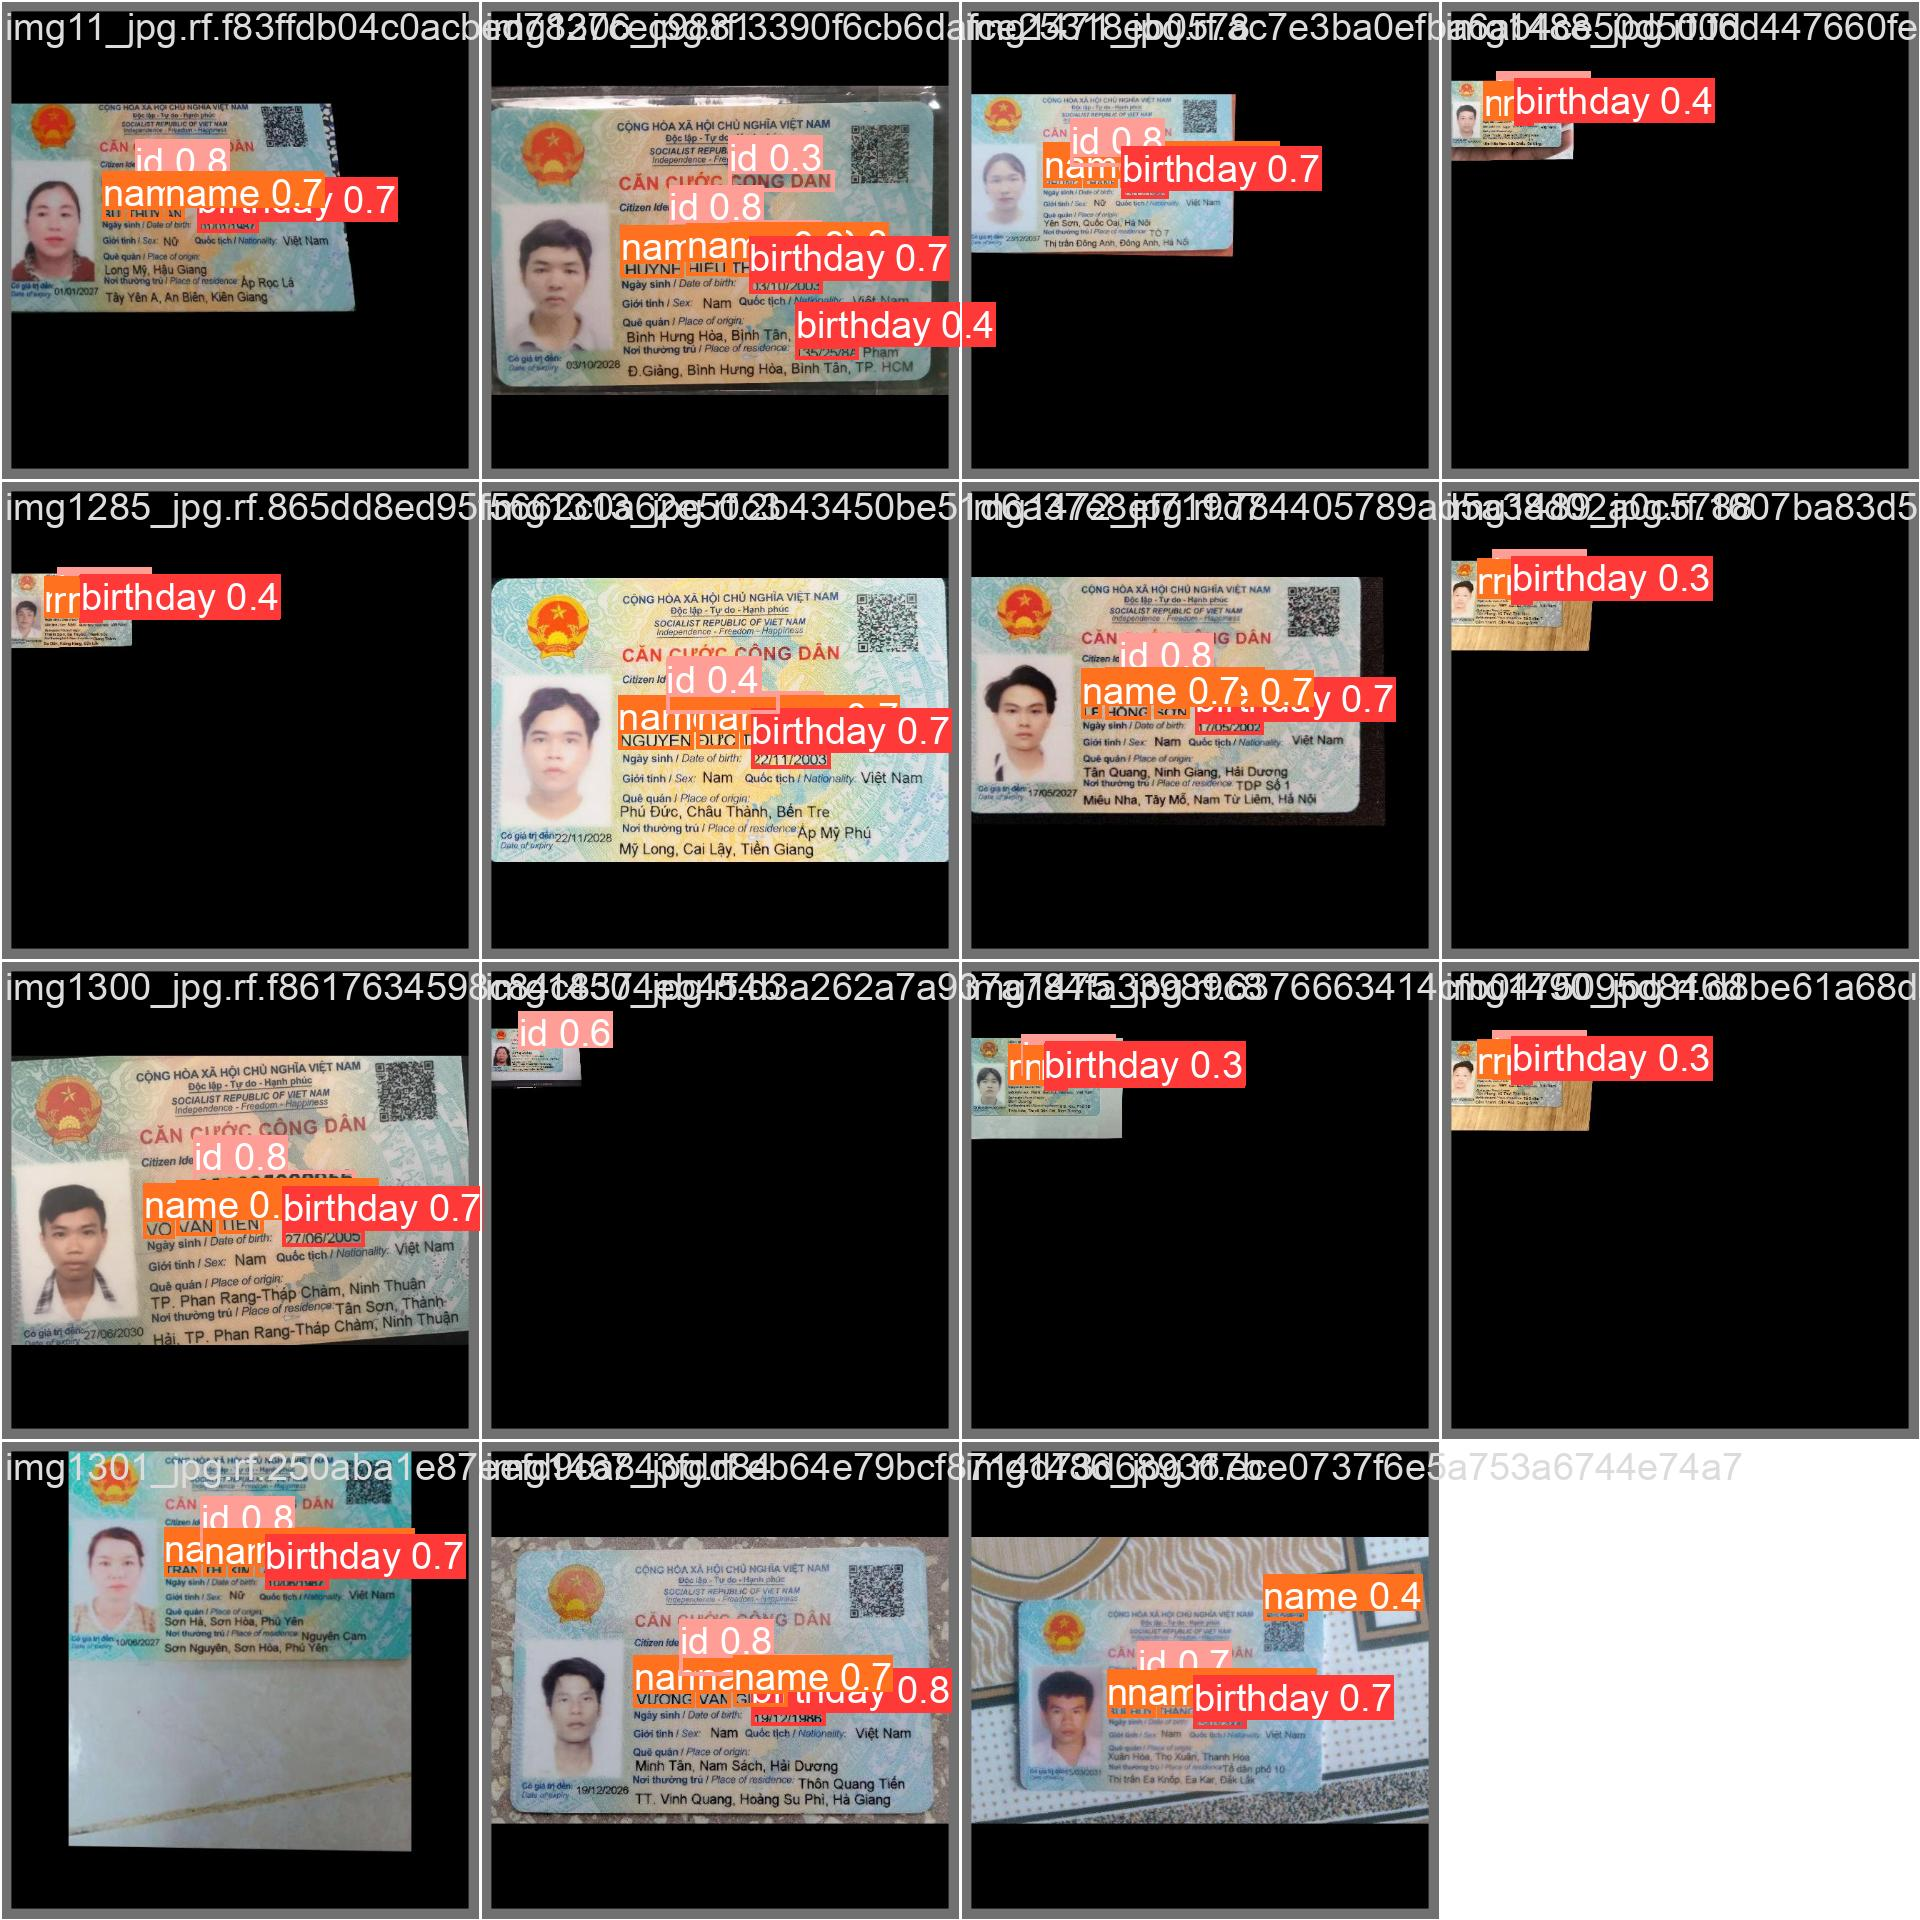

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/idCard-text-detection-3/valid/labels.cach
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 76. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         15         76      0.935      0.948      0.953       0.63
              birthday         15         15      0.933       0.93      0.926      0.577
                    id         15         15      0.919          1      0.995      0.692
                  name         15         46      0.952      0.913      0.939      0.623
Speed: 0.4ms preproces

## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/35 /kaggle/working/datasets/idCard-text-detection-3/test/images/img1194_jpg.rf.fffceab67856bf78c394d4252a8e582c.jpg: 640x640 1 birthday, 2 ids, 3 names, 11.5ms
image 2/35 /kaggle/working/datasets/idCard-text-detection-3/test/images/img1270_jpg.rf.43c94a6aac747be39c525d9462ad3953.jpg: 640x640 1 birthday, 1 id, 4 names, 8.0ms
image 3/35 /kaggle/working/datasets/idCard-text-detection-3/test/images/img1273_jpg.rf.dd3974995e0702dde767c34d26934f20.jpg: 640x640 1 birthday, 1 id, 4 names, 7.9ms
image 4/35 /kaggle/working/datasets/idCard-text-detection-3/test/images/img1274_jpg.rf.27c26ea4ddeebfb3a684052b429d057a.jpg: 640x640 2 birthdays, 1 id, 4 names, 7.9ms
image 5/35 /kaggle/working/datasets/idCard-text-detection-3/test/images/img1287_jpg.rf.3541cd5c7e8b6c9926fbb4aab4aa6933.jpg: 640x640 1 birthd

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/idcardocr-cnbea/idcard-text-detection/3
Share your model with the world at: https://universe.roboflow.com/idcardocr-cnbea/idcard-text-detection/model/3
